In [1]:
%env CUDA_DEVICE_ORDER=PCI_BUS_ID
#%env CUDA_VISIBLE_DEVICES=3

env: CUDA_DEVICE_ORDER=PCI_BUS_ID


In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from ganime.data.base import load_dataset
from ganime.utils.statistics import dataset_statistics
from ganime.model.vqgan.vqgan import VQGAN
from ganime.visualization.videos import display_images, display_videos
import tensorflow as tf
from tqdm import tqdm
tf.get_logger().setLevel('ERROR')

In [4]:
from ganime.model.vqgan.losses.lpips import LPIPS

In [101]:
loss = LPIPS()

In [55]:
loss.model.layers[-1].weights[0].numpy().mean()

-0.0010818949

In [115]:
loss = LPIPS()
loss_res = loss(tf.zeros((1, 64, 64, 3), dtype=tf.float32), tf.ones((1, 64, 64, 3), dtype=tf.float32))
print(loss_res)

tf.Tensor(0.49456352, shape=(), dtype=float32)


In [4]:
for device in tf.config.list_physical_devices("GPU"):
    tf.config.experimental.set_memory_growth(device, True)

In [5]:
train_ds, test_ds, input_shape = load_dataset("kny_images", "../../../data", batch_size=128)

2022-05-11 04:54:33.531957: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-05-11 04:54:37.727077: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 14252 MB memory:  -> device: 0, name: NVIDIA RTX A4000, pci bus id: 0000:01:00.0, compute capability: 8.6
2022-05-11 04:54:37.728314: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 14252 MB memory:  -> device: 1, name: NVIDIA RTX A4000, pci bus id: 0000:25:00.0, compute capability: 8.6
2022-05-11 04:54:37.729299: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0/task:0/device:GPU:2 w

In [6]:
strategy = tf.distribute.MirroredStrategy()

In [7]:
train_mean, train_var, train_std = dataset_statistics(train_ds)

  0%|          | 0/79 [00:00<?, ?it/s]

In [8]:
next(train_ds.as_numpy_iterator())[0].shape

(128, 64, 64, 3)

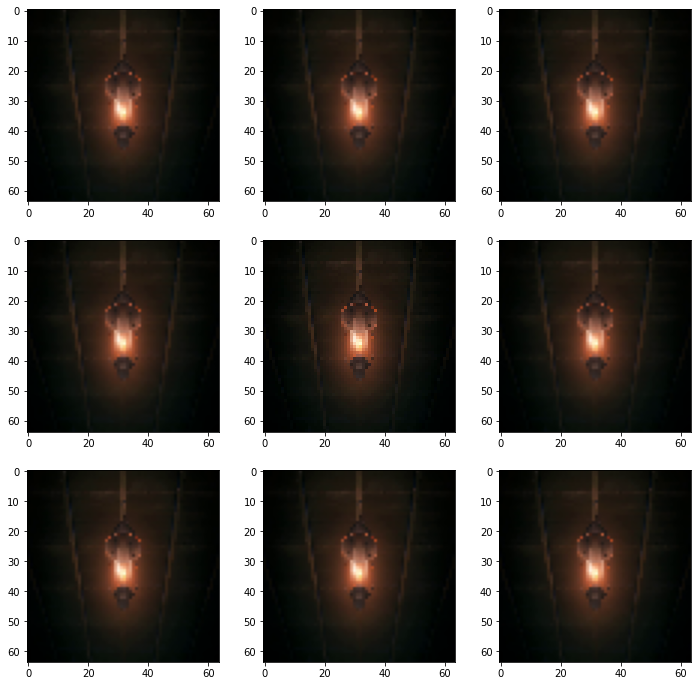

In [9]:
display_images(next(train_ds.as_numpy_iterator())[0])
plt.show()

In [10]:
with strategy.scope():
    vqgan = VQGAN(num_embeddings=256, embedding_dim=128, train_variance=train_var)

Working with z of shape (1, 128, 8, 8) = 8192 dimensions.


In [11]:
with strategy.scope():
    vqgan.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=5e-4))
    history = vqgan.fit(train_ds, epochs=100)

2022-05-11 04:55:05.537559: W tensorflow/core/grappler/optimizers/data/auto_shard.cc:766] AUTO sharding policy will apply DATA sharding policy as it failed to apply FILE sharding policy because of the following reason: Found an unshardable source dataset: name: "TensorSliceDataset/_1"
op: "TensorSliceDataset"
input: "Placeholder/_0"
attr {
  key: "Toutput_types"
  value {
    list {
      type: DT_UINT8
    }
  }
}
attr {
  key: "_cardinality"
  value {
    i: 10000
  }
}
attr {
  key: "is_files"
  value {
    b: false
  }
}
attr {
  key: "metadata"
  value {
    s: "\n\024TensorSliceDataset:0"
  }
}
attr {
  key: "output_shapes"
  value {
    list {
      shape {
        dim {
          size: 480
        }
        dim {
          size: 848
        }
        dim {
          size: 3
        }
      }
    }
  }
}



Epoch 1/100


2022-05-11 04:56:30.369203: I tensorflow/stream_executor/cuda/cuda_dnn.cc:366] Loaded cuDNN version 8101
2022-05-11 04:56:31.963936: I tensorflow/stream_executor/cuda/cuda_dnn.cc:366] Loaded cuDNN version 8101
2022-05-11 04:56:33.555927: I tensorflow/stream_executor/cuda/cuda_dnn.cc:366] Loaded cuDNN version 8101
2022-05-11 04:56:35.406869: I tensorflow/stream_executor/cuda/cuda_dnn.cc:366] Loaded cuDNN version 8101
2022-05-11 04:56:37.526824: I tensorflow/stream_executor/cuda/cuda_dnn.cc:366] Loaded cuDNN version 8101
2022-05-11 04:56:39.085437: I tensorflow/stream_executor/cuda/cuda_dnn.cc:366] Loaded cuDNN version 8101
2022-05-11 04:56:39.746764: W tensorflow/core/common_runtime/bfc_allocator.cc:275] Allocator (GPU_0_bfc) ran out of memory trying to allocate 2.30GiB with freed_by_count=0. The caller indicates that this is not a failure, but may mean that there could be performance gains if more memory were available.
2022-05-11 04:56:39.746900: W tensorflow/core/common_runtime/bfc_a

79/79 [==============================] - 114s 180ms/step - loss: 3.8709 - reconstruction_loss: 1.0265 - vqvae_loss: 2.6813
Epoch 2/100
79/79 [==============================] - 12s 139ms/step - loss: 3.9869 - reconstruction_loss: 0.8193 - vqvae_loss: 3.1377
Epoch 3/100
79/79 [==============================] - 12s 139ms/step - loss: 3.5839 - reconstruction_loss: 0.7901 - vqvae_loss: 2.8155
Epoch 4/100
79/79 [==============================] - 12s 139ms/step - loss: 1.6436 - reconstruction_loss: 0.6494 - vqvae_loss: 0.9653
Epoch 5/100
79/79 [==============================] - 12s 140ms/step - loss: 1.6612 - reconstruction_loss: 0.4198 - vqvae_loss: 1.1760
Epoch 6/100
79/79 [==============================] - 12s 140ms/step - loss: 1.3147 - reconstruction_loss: 0.3682 - vqvae_loss: 0.9292
Epoch 7/100
79/79 [==============================] - 12s 141ms/step - loss: 1.4560 - reconstruction_loss: 0.3415 - vqvae_loss: 1.1060
Epoch 8/100
79/79 [==============================] - 12s 140ms/step - los

In [24]:
x = next(test_ds.as_numpy_iterator())[0]
x = x.copy()
np.random.shuffle(x)
generated = vqgan(x[:10])

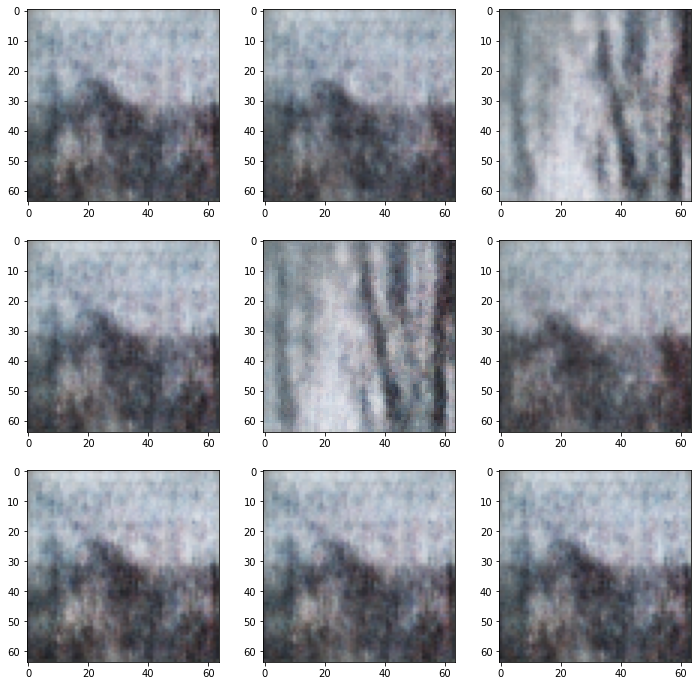

In [25]:
display_images(generated)
plt.show()

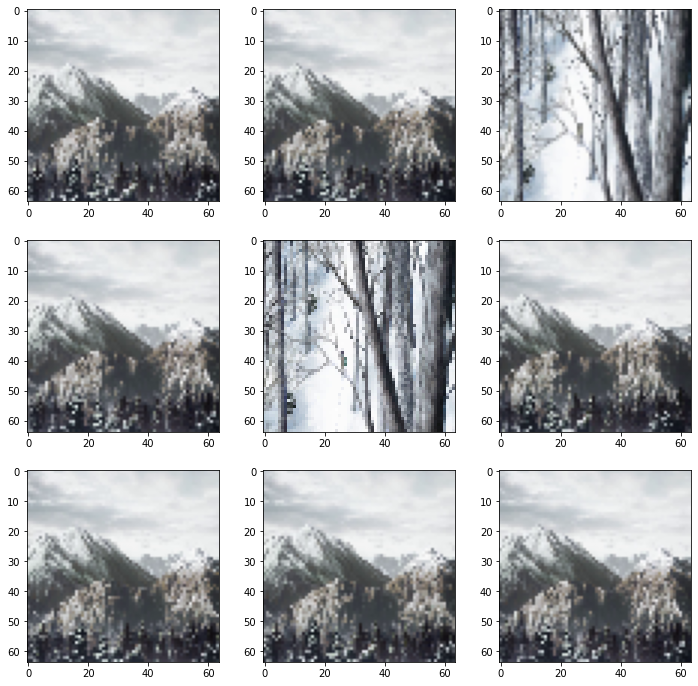

In [26]:
display_images(x)
plt.show()

In [27]:
x2 = next(train_ds.as_numpy_iterator())[0]
x2 = x2.copy()
np.random.shuffle(x2)
generated2 = vqgan(x2[:10])

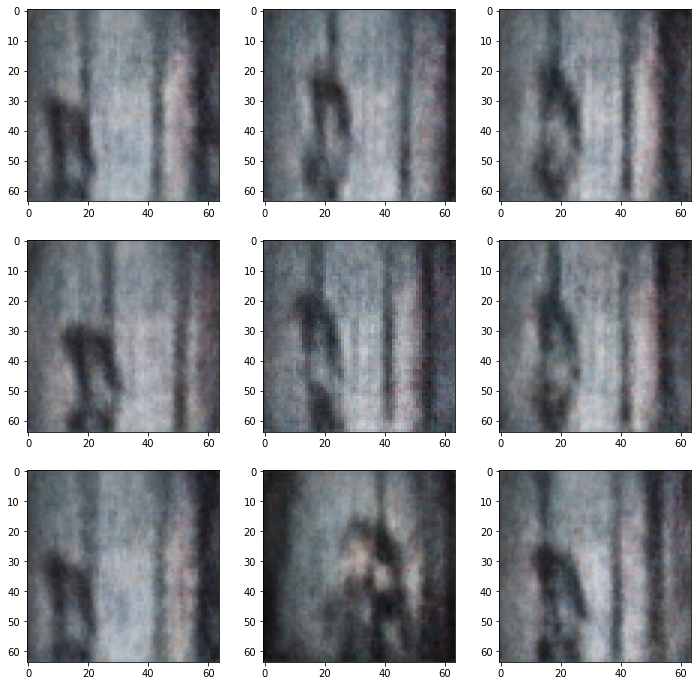

In [28]:
display_images(generated2)
plt.show()

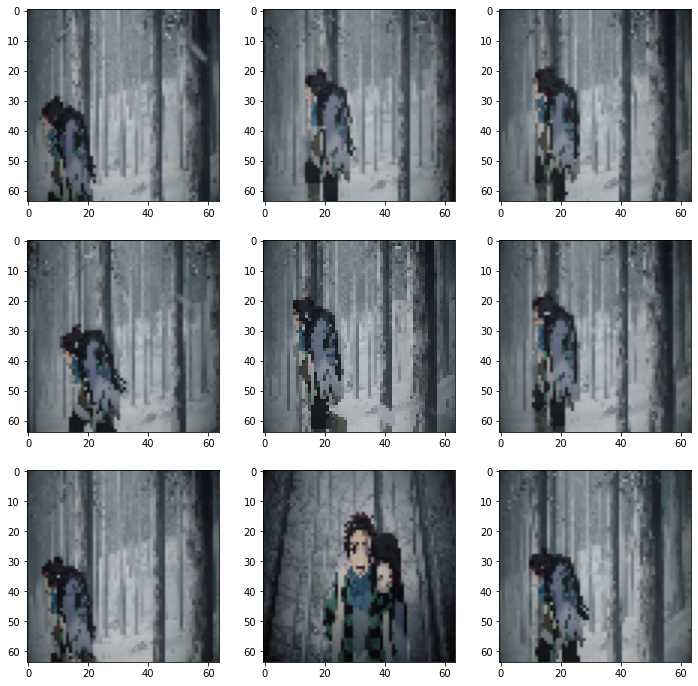

In [29]:
display_images(x2)
plt.show()

In [5]:
from tensorflow.keras.applications.vgg16 import VGG16
vgg = VGG16(weights='imagenet', include_top=False)


In [6]:
vgg.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     